In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def use_custom_plot_settings(font_weight="normal"):
    font_size_extra_small = 12
    font_size_small = 16
    font_size_medium = 18
    font_size_big = 20

    plt.style.use("default")
    
    plt.rc("font", size=font_size_small, weight=font_weight)
    plt.rc("axes", titlesize=font_size_big, titleweight=font_weight)
    plt.rc("axes", labelsize=font_size_medium, labelweight=font_weight)
    plt.rc("xtick", labelsize=font_size_small)
    plt.rc("ytick", labelsize=font_size_small)
    plt.rc("legend", fontsize=font_size_extra_small)
    plt.rc("figure", titlesize=font_size_big, titleweight=font_weight)

def use_default_plot_settings():
    plt.rcdefaults()
    
use_custom_plot_settings(font_weight="normal")
print(plt.style.available)

['seaborn-poster', 'seaborn-dark', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-darkgrid', 'Solarize_Light2', 'grayscale', '_classic_test', 'bmh', 'seaborn-deep', 'tableau-colorblind10', 'fast', 'seaborn', 'seaborn-pastel', 'seaborn-muted', 'seaborn-ticks', 'dark_background', 'seaborn-bright', 'classic', 'seaborn-talk', 'seaborn-white', 'ggplot', 'seaborn-paper', 'seaborn-dark-palette', 'seaborn-whitegrid', 'fivethirtyeight']


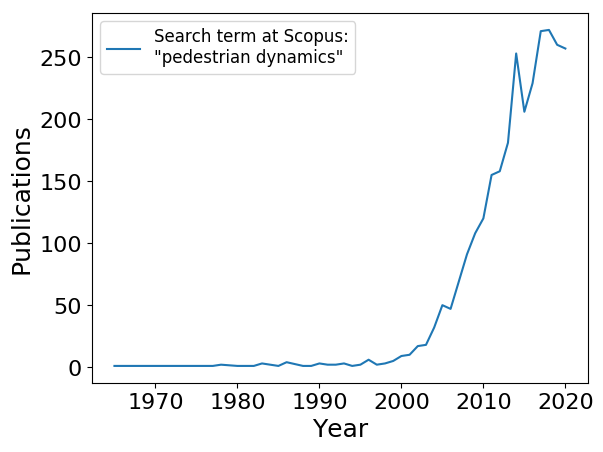

In [3]:
file_year = "Scopus-Search-PedestrianDynamics-ByYear.csv"

fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.read_csv(file_year,
                        sep=",",
                        names=["year", "pubs"],
                        header=0)

ax.plot(df["year"], df["pubs"], label="Search term at Scopus:\n\"pedestrian dynamics\"")

# ax.set_title("Publications per year listed in the Scopus database")

ax.set_xlabel("Year")
ax.set_ylabel("Publications")
ax.legend()

# print(df.to_latex())
fig.savefig("../PedestrianDynamics-SearchResults-Scopus-LineChartByYear.pdf", bbox_inches="tight", transparent=True)
plt.show()

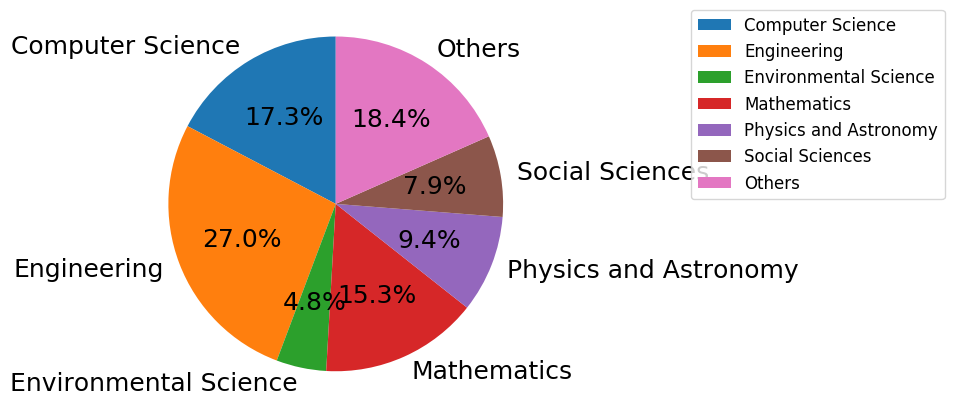

In [10]:
file_year = "Scopus-Search-PedestrianDynamics-BySubjectArea.csv"

fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.read_csv(file_year,
                        sep=",",
                        names=["subject", "pubs"],
                        header=0)

min_pub_count = 125
data_subject_above = df[df["pubs"] > min_pub_count]
data_subject_below = df[df["pubs"] <= min_pub_count]

data_subject_all = data_subject_above
others = data_subject_below['pubs'].sum()
data_subject_all = data_subject_all.append({'subject' : 'Others' , 'pubs' : others} , ignore_index=True)

use_default_plot_settings()
ax.pie(data_subject_all["pubs"], labels=data_subject_all["subject"], autopct='%1.1f%%', shadow=False, startangle=90, textprops={"fontsize": 18})

# ax.set_title("Publications by subject listed in the Scopus database")

ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(bbox_to_anchor=(1.2, 1.05), fontsize=12)

# print(df.to_latex())
fig.savefig("../PedestrianDynamics-SearchResults-Scopus-PieChartBySubject.pdf", bbox_inches="tight", transparent=True)
plt.show()